![Logo](assets/logo.png)

Made by **Domonkos Nagy**

# Gambler's problem

A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of \\$100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite
MDP. The state is the gambler’s capital, $ s \in {1, 2, . . . , 99} $ and the actions
are stakes, $ a \in {0, 1, . . . , min(s, 100 - s)} $. The reward is zero on all transitions
except those on which the gambler reaches his goal, when it is +1.

Our goal is to find the optimal policy for this problem. We will implement a simple
algorithm that uses *value iteration* to solve the Bellman equation for the state-value
function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROB_HEADS = 0.4  # probability that a coin comes up heads
THETA = 1e-12  # error treshold for the value iteration

In [3]:
v_estimations = np.zeros(101)  # value function
policy = np.zeros(101, dtype=int)
v_estimations[100] = 1  # reaching $100 grants us a reward of +1

## Value iteration

Value iteration is similar to policy iteration, but the policy evaluation and policy improvement steps are combined. At each iteration,
we update the value function according to the following formula:

$$ v_{k+1}(s) = \max_a \sum_{s', r}p(s', r | s, a) [r + \gamma v_k(s')] $$

This update rule finds the action that yields the highest expected return, and then updates the value function accordingly. Recall that with policy iteration, we evaluated the current policy to some desired accuracy, and then updated the policy to be greedy with respect to the new value function. Here, instead of evaluating one fixed policy and then updating it afterwards, the policy is constantly evolving during the process. Value iteration can be viewed as simply turning the Bellman optimality equation into an update rule.

The code below implements value iteration for this problem, and plots out the value function after each iteration.

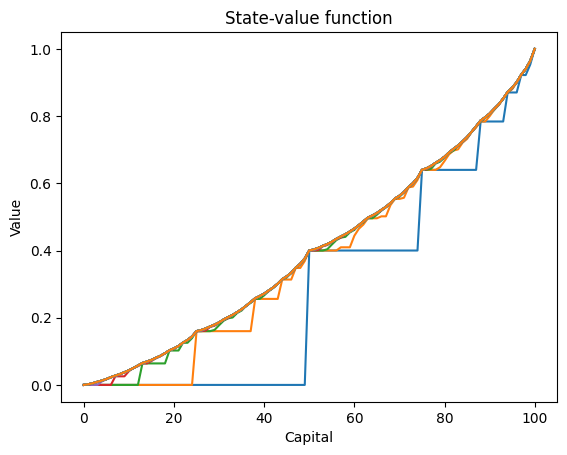

# of sweeps: 22


In [4]:
delta = THETA
i = 0

while delta >= THETA:
    delta = 0

    # terminal states (0 and 100) are excluded from the loop
    for state in range(1, 100):
        v_old = v_estimations[state]

        best_action_value = 0
        best_action = 0

        for action in range(1, min(state, 100 - state) + 1):
            action_value = 0

            state_win = state + action
            state_lose = max(0, state - action)

            action_value += PROB_HEADS * v_estimations[state_win]
            action_value += (1 - PROB_HEADS) * v_estimations[state_lose]

            # if the difference is less than the error margin, we don't
            # update the best action
            if action_value - THETA > best_action_value:
                best_action_value = action_value
                best_action = action

        # updating the value function and the policy
        v_estimations[state] = best_action_value
        policy[state] = best_action

        delta = max(delta, abs(v_old - best_action_value))

    # plotting the resulting value funtion
    plt.plot(np.arange(101), v_estimations)
    i += 1

plt.xlabel('Capital')
plt.ylabel('Value')
plt.title('State-value function')
plt.show()

print(f'# of sweeps: {i}')

## Optimal policy
The resulting policy can be seen below. The x axis corresponds to the state (the current capital), and the y axis shows the optimal amount of money to bet in a given state. As you can see, the graph has a peculiar, self-similar shape. Can you explain why? Think about how you would approach this problem, and keep the value of `PROB_HEADS` in mind!

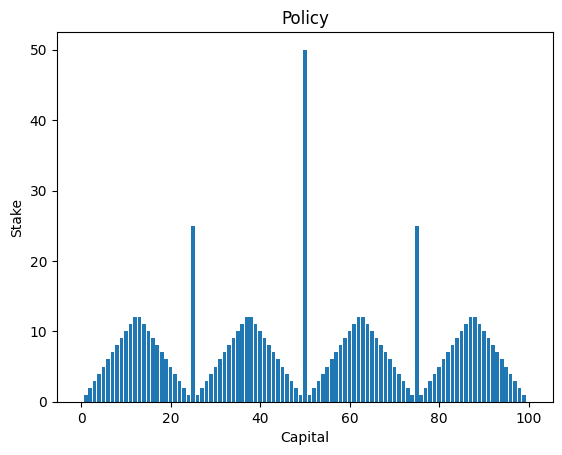

In [5]:
fig, ax = plt.subplots()
ax.bar(np.arange(101), policy)

plt.xlabel('Capital')
plt.ylabel('Stake')
plt.title('Policy')
plt.show()